# Galaxies within 0.2 dex of Main Sequence Relation

#### Cosmology: Planck2015
#### Simulation Name: TNG-50
#### Redshift Bin:0.45-1.05  
50   0.5   1<br>
59   0.5882   0.7<br>
67   0.6667   0.5 

In [1]:
import illustris_python as il
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
from scipy.optimize import curve_fit

# PREPARING THE DATA
The following data is available:<br>
1. Subhalo Mass
2. $R_{eff}$
3. Stellar Mass
4. Dark Matter Mass
5. Gaseous Mass
6. SFR
7. $V_{max}$
8. Velocity Dispersion

### z=0.5

In [2]:
basePath = 'sims.TNG/TNG50-1/output'
full_data=il.groupcat.loadSubhalos(basePath,67,fields=['SubhaloMassType','SubhaloHalfmassRad','SubhaloHalfmassRadType','SubhaloFlag','SubhaloMass','SubhaloSFR','SubhaloVmax','SubhaloVelDisp'])
full_data

{'count': 6244619,
 'SubhaloMassType': array([[7.3357812e+02, 5.3455137e+03, 0.0000000e+00, 0.0000000e+00,
         1.2366412e+02, 1.9649856e-01],
        [2.9047101e+02, 2.6876431e+03, 0.0000000e+00, 0.0000000e+00,
         1.4370955e+02, 2.2928143e-01],
        [8.6484823e+00, 3.6980606e+02, 0.0000000e+00, 0.0000000e+00,
         2.8518532e+01, 5.2890435e-02],
        ...,
        [0.0000000e+00, 9.2210312e-04, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 9.8357664e-04, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 9.8357664e-04, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 'SubhaloHalfmassRad': array([407.79962  , 227.15967  ,  94.803764 , ...,   1.6145127,
          3.5943959,   1.7483948], dtype=float32),
 'SubhaloHalfmassRadType': array([[430.52124  , 412.7732   ,   0.       ,   0.       ,  22.694695 ,
           0.       ],
        [303.3915

In [3]:
a=0.6667
h=0.6774

z1_Subhaloflag=full_data['SubhaloFlag']
z1_Subhalomass_gas=full_data['SubhaloMassType'][:,0]*1e10/h
z1_Subhalomass_star=full_data['SubhaloMassType'][:,4]*1e10/h
z1_Subhalomass_dm=full_data['SubhaloMassType'][:,1]*1e10/h
z1_Subhalo_sreff=full_data['SubhaloHalfmassRadType'][:,4]*a/h
z1_Subhalo_reff=full_data['SubhaloHalfmassRad']*a/h
z1_Subhalo_sfr=full_data['SubhaloSFR']
z1_Subhalo_Flag=full_data['SubhaloFlag']
z1_Subhalo_Vmax=full_data['SubhaloVmax']
z1_Subhalo_Sigma=full_data['SubhaloVelDisp']
z1_Subhalo_mass=full_data['SubhaloMass']*1e10/h
z1=np.full((len(z1_Subhalomass_gas),1),0.5)

Conversion of units from comoving to physical, $\frac{10^{10}}{h} M_{\odot}$ to $M_{\odot}$ etc

### z=0.7

In [4]:
full_data2=il.groupcat.loadSubhalos(basePath,59,fields=['SubhaloMassType','SubhaloHalfmassRad','SubhaloHalfmassRadType','SubhaloFlag','SubhaloMass','SubhaloSFR','SubhaloVmax','SubhaloVelDisp'])

In [5]:
a=0.5882
h=0.6774

z2_Subhaloflag=full_data2['SubhaloFlag']
z2_Subhalomass_gas=full_data2['SubhaloMassType'][:,0]*1e10/h
z2_Subhalomass_star=full_data2['SubhaloMassType'][:,4]*1e10/h
z2_Subhalomass_dm=full_data2['SubhaloMassType'][:,1]*1e10/h
z2_Subhalo_sreff=full_data2['SubhaloHalfmassRadType'][:,4]*a/h
z2_Subhalo_reff=full_data2['SubhaloHalfmassRad']*a/h
z2_Subhalo_sfr=full_data2['SubhaloSFR']
z2_Subhalo_Flag=full_data2['SubhaloFlag']
z2_Subhalo_Vmax=full_data2['SubhaloVmax']
z2_Subhalo_Sigma=full_data2['SubhaloVelDisp']
z2_Subhalo_mass=full_data2['SubhaloMass']*1e10/h
z2=np.full((len(z2_Subhalomass_gas),1),0.7)

### z=1

In [6]:
full_data3=il.groupcat.loadSubhalos(basePath,50,fields=['SubhaloMassType','SubhaloHalfmassRad','SubhaloHalfmassRadType','SubhaloFlag','SubhaloMass','SubhaloSFR','SubhaloVmax','SubhaloVelDisp'])

In [7]:
a=0.5
h=0.6774

z3_Subhaloflag=full_data3['SubhaloFlag']
z3_Subhalomass_gas=full_data3['SubhaloMassType'][:,0]*1e10/h
z3_Subhalomass_star=full_data3['SubhaloMassType'][:,4]*1e10/h
z3_Subhalomass_dm=full_data3['SubhaloMassType'][:,1]*1e10/h
z3_Subhalo_sreff=full_data3['SubhaloHalfmassRadType'][:,4]*a/h
z3_Subhalo_reff=full_data3['SubhaloHalfmassRad']*a/h
z3_Subhalo_sfr=full_data3['SubhaloSFR']
z3_Subhalo_Flag=full_data3['SubhaloFlag']
z3_Subhalo_Vmax=full_data3['SubhaloVmax']
z3_Subhalo_Sigma=full_data3['SubhaloVelDisp']
z3_Subhalo_mass=full_data3['SubhaloMass']*1e10/h
z3=np.full((len(z3_Subhalomass_gas),1),1)

Pick galaxies of cosmological origin only, remove ones with SFR and Mass<0

In [8]:
def good_galaxies(z_fields):
    z_Subhaloflag,z_Subhalomass_gas,z_Subhalomass_star,z_Subhalomass_dm,z_Subhalo_reff,z_Subhalo_sreff,z_Subhalo_sfr,z_Subhalo_Vmax,z_Subhalo_Sigma,z_Subhalo_mass,z=z_fields
    good_ones=np.where((z_Subhaloflag==True) &(z_Subhalomass_star > 0) & (z_Subhalo_sfr > 0) &(z_Subhalomass_star != np.nan) &(z_Subhalo_sfr != np.nan))

    newfields=[field[good_ones] for field in z_fields]
    return newfields

In [9]:
z1_Subhaloflag,z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1=good_galaxies([z1_Subhaloflag,z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1])
z2_Subhaloflag,z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2=good_galaxies([z2_Subhaloflag,z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2])
z3_Subhaloflag,z3_Subhalomass_gas,z3_Subhalomass_star,z3_Subhalomass_dm,z3_Subhalo_reff,z3_Subhalo_sreff,z3_Subhalo_sfr,z3_Subhalo_Vmax,z3_Subhalo_Sigma,z3_Subhalo_mass,z3=good_galaxies([z3_Subhaloflag,z3_Subhalomass_gas,z3_Subhalomass_star,z3_Subhalomass_dm,z3_Subhalo_reff,z3_Subhalo_sreff,z3_Subhalo_sfr,z3_Subhalo_Vmax,z3_Subhalo_Sigma,z3_Subhalo_mass,z3])

# Speagle's Relation
log SFR(M∗, t) = (0.84 ± 0.02 − 0.026 ± 0.003 × t) log M∗−(6.51 ± 0.24 − 0.11 ± 0.03 × t)

# z=0.5

In [10]:
def speagle_params(z):
    t=cosmo.age(z).value
    return 0.84-0.026*t, -(6.51-0.11*t)

def speagle(z,logmass):
    return speagle_params(z)[0]*logmass+speagle_params(z)[1]

In [11]:
def pearson(z,logmass):
    slope=1.1+0.5*np.log(0.03+z)
    intercept=0.38+0.12*z-10.5*slope
    return slope*logmass+intercept

In [12]:
def iyer(z,logmass):
    t=cosmo.age(z).value
    return (0.80-0.017*t)*logmass-(6.487-0.039*t)

In [13]:
def compare_mainseq(z,log_ms,log_sfr):
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    ax.plot(log_ms,log_sfr,'.',markersize=2)
    x=np.linspace(8,11.5,len(log_ms))
    pearson_values=pearson(z,x)
    speagle_values=speagle(z,x)
    iyer_values=iyer(z,x)

    ax.plot(x,pearson_values,label='Pearson et al 2018',linewidth=4,color='brown')
    ax.plot(x,speagle_values,label='Speagle et al 2014',linewidth=4,color='red')
    ax.plot(x,iyer_values,label='Iyer et al 2018',linewidth=4,color='green')

    ax.set_xlim(8,11.5)
    ax.set_xlabel('log Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}$]')
    ax.set_ylabel('log Star Formation Rate [yr$^{-1}$]')
    ax.legend()
    plt.show()    

In [14]:
log_ms=np.log10(z1_Subhalomass_star)
log_sfr=np.log10(z1_Subhalo_sfr)

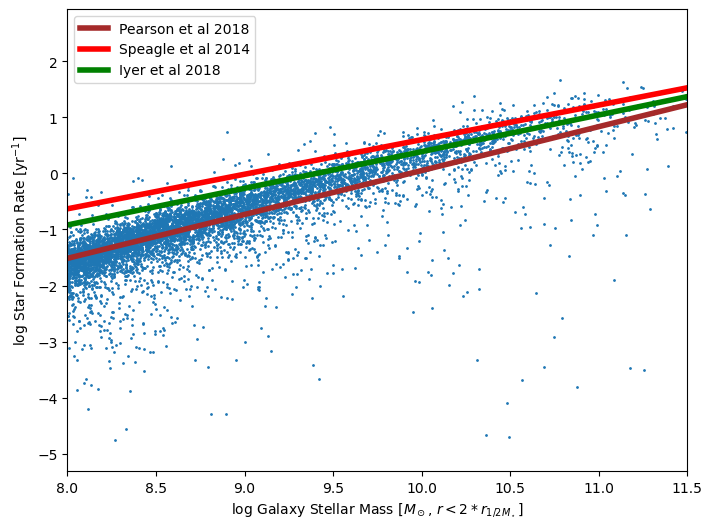

In [15]:
compare_mainseq(0.5,log_ms,log_sfr)

Pearson is a better fit

In [16]:
good_ones=np.where((abs(pearson(0.5,log_ms)-log_sfr)<0.6))
fields=z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1
newfields=[field[good_ones] for field in fields]
z1_Subhalomass_gas,z1_Subhalomass_star,z1_Subhalomass_dm,z1_Subhalo_reff,z1_Subhalo_sreff,z1_Subhalo_sfr,z1_Subhalo_Vmax,z1_Subhalo_Sigma,z1_Subhalo_mass,z1=newfields

In [17]:
log_ms=np.log10(z1_Subhalomass_star)
log_sfr=np.log10(z1_Subhalo_sfr)

## Binning the Data

In [18]:
def bin_data(log_ms,log_sfr,nbins):
    mass_bins=np.linspace(log_ms.min(),log_ms.max(),nbins,endpoint=True)
    bin_indices=np.digitize(log_ms, mass_bins, right=False)
    binned_data={bin_start:[] for bin_start in mass_bins[0:-1]}

    for i, bin_start in enumerate(mass_bins[0:-1]):
        mask=bin_indices==i+1
        binned_data[bin_start]=list(zip(log_ms[mask],log_sfr[mask]))
        
    logms_binned=[(mass_bins[i]+mass_bins[i+1])/2 for i in range(len(mass_bins)-1)]
    logsfr_binned = [np.median([i[1] for i in binned_data[bin_start]]) for bin_start in mass_bins[0:-1]]
        
    return logms_binned,logsfr_binned

In [19]:
logms_binned,logsfr_binned=bin_data(log_ms,log_sfr,15)

## Attempting to Match Simulation Data with Observations

In [20]:
def line(x,m,c):
    return m*x+c

popt,pcov=curve_fit(line,logms_binned,logsfr_binned)

In [21]:
def plot_pearson(z,log_ms,log_sfr,logms_binned,logsfr_binned):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.plot(log_ms,log_sfr,'.',markersize=2)
    x=np.linspace(8,11.5,len(log_ms))
    pearson_values=pearson(z,x)

    ax.plot(x,pearson_values,label='Pearson et al 2018',linewidth=4,color='brown')
    ax.plot(x,line(x,popt[0],popt[1]),label='Best Fit',linewidth=4,color='green')
    ax.plot(x,pearson_values+0.3,'--',color='black',linewidth=2)
    ax.plot(x,pearson_values-0.3,'--',color='black',linewidth=2)
    ax.scatter(logms_binned,logsfr_binned,color='orange',s=40,zorder=5)

    ax.set_xlim(8,11.5)
    ax.set_xlabel('log Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}$]')
    ax.set_ylabel('log Star Formation Rate [yr$^{-1}$]')
    ax.legend()
    plt.show()

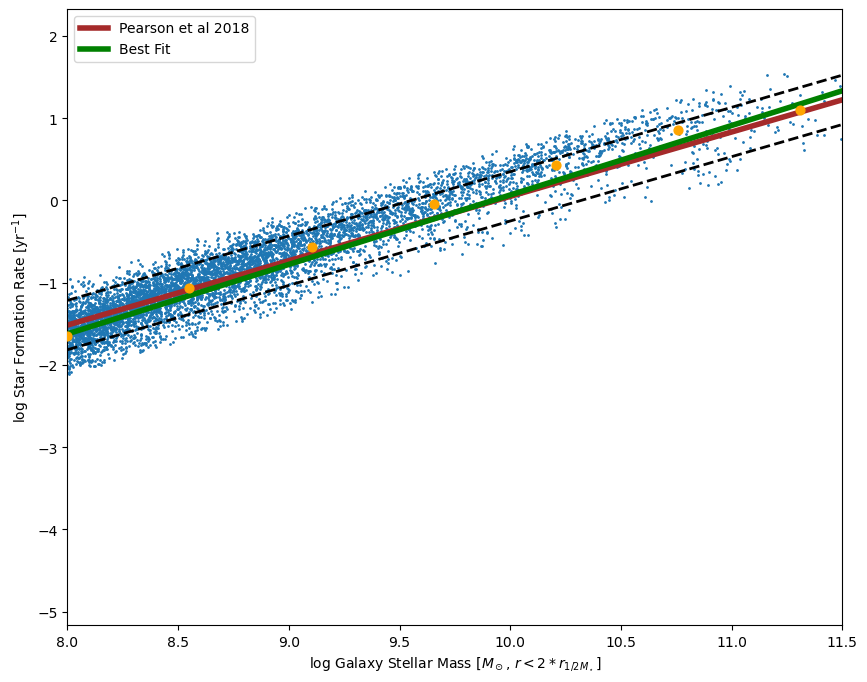

In [22]:
plot_pearson(0.5,log_ms,log_sfr,logms_binned,logsfr_binned)

# z=0.7

https://browse.arxiv.org/pdf/1706.07059.pdf
https://iopscience.iop.org/article/10.3847/1538-4357/aae0fa/pdf

In [23]:
log_ms=np.log10(z2_Subhalomass_star)
log_sfr=np.log10(z2_Subhalo_sfr)

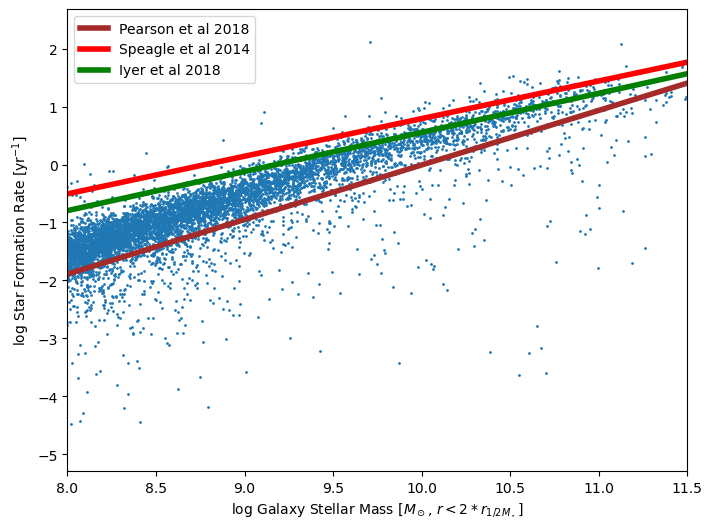

In [24]:
compare_mainseq(0.7,log_ms,log_sfr)

Iyer is a better fit

In [25]:
good_ones=np.where((abs(iyer(0.7,log_ms)-log_sfr)<0.6))
fields=z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2
newfields=[field[good_ones] for field in fields]
z2_Subhalomass_gas,z2_Subhalomass_star,z2_Subhalomass_dm,z2_Subhalo_reff,z2_Subhalo_sreff,z2_Subhalo_sfr,z2_Subhalo_Vmax,z2_Subhalo_Sigma,z2_Subhalo_mass,z2=newfields

In [26]:
log_ms=np.log10(z2_Subhalomass_star)
log_sfr=np.log10(z2_Subhalo_sfr)

In [27]:
logms_binned,logsfr_binned=bin_data(log_ms,log_sfr,15)

In [28]:
popt,pcov=curve_fit(line,logms_binned,logsfr_binned)

In [29]:
def plot_iyer(z,log_ms,log_sfr,logms_binned,logsfr_binned):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.plot(log_ms,log_sfr,'.',markersize=2)
    x=np.linspace(8,11.5,len(log_ms))
    iyer_values=iyer(z,x)

    ax.plot(x,iyer_values,label='Iyer et al 2018',linewidth=4,color='brown')
    ax.plot(x,line(x,popt[0],popt[1]),label='Best Fit',linewidth=4,color='green')
    ax.plot(x,iyer_values+0.3,'--',color='black',linewidth=2)
    ax.plot(x,iyer_values-0.3,'--',color='black',linewidth=2)
    ax.scatter(logms_binned,logsfr_binned,color='orange',s=40,zorder=5)

    ax.set_xlim(8,11.5)
    ax.set_xlabel('log Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}$]')
    ax.set_ylabel('log Star Formation Rate [yr$^{-1}$]')
    ax.legend()
    plt.show()

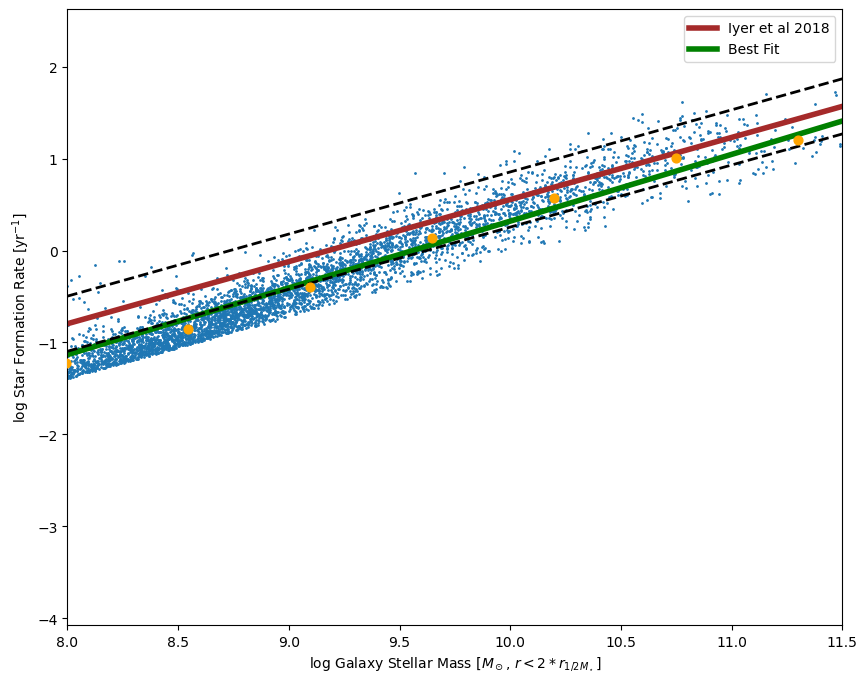

In [30]:
plot_iyer(0.7,log_ms,log_sfr,logms_binned,logsfr_binned)

# z=1

In [31]:
log_ms=np.log10(z3_Subhalomass_star)
log_sfr=np.log10(z3_Subhalo_sfr)

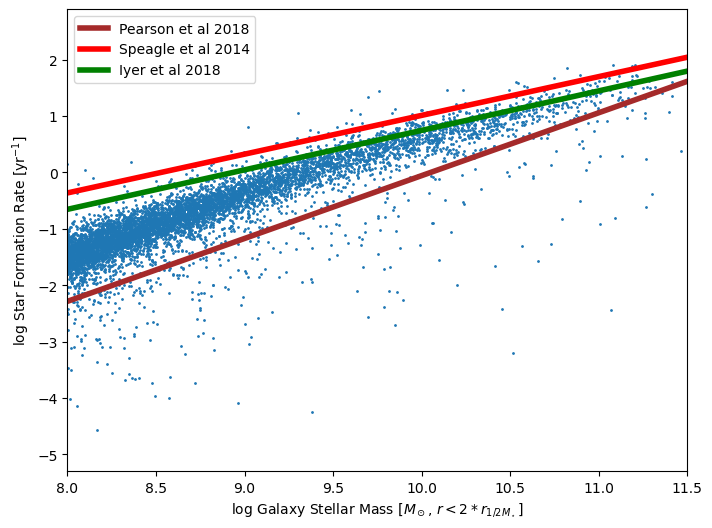

In [32]:
compare_mainseq(1,log_ms,log_sfr)

Iyer is a better fit

In [33]:
good_ones=np.where((abs(iyer(1,log_ms)-log_sfr)<0.6))
fields=z3_Subhalomass_gas,z3_Subhalomass_star,z3_Subhalomass_dm,z3_Subhalo_reff,z3_Subhalo_sreff,z3_Subhalo_sfr,z3_Subhalo_Vmax,z3_Subhalo_Sigma,z3_Subhalo_mass,z3
newfields=[field[good_ones] for field in fields]
z3_Subhalomass_gas,z3_Subhalomass_star,z3_Subhalomass_dm,z3_Subhalo_reff,z3_Subhalo_sreff,z3_Subhalo_sfr,z3_Subhalo_Vmax,z3_Subhalo_Sigma,z3_Subhalo_mass,z3=newfields

In [34]:
log_ms=np.log10(z3_Subhalomass_star)
log_sfr=np.log10(z3_Subhalo_sfr)

In [35]:
logms_binned,logsfr_binned=bin_data(log_ms,log_sfr,15)

In [36]:
popt,pcov=curve_fit(line,logms_binned,logsfr_binned)

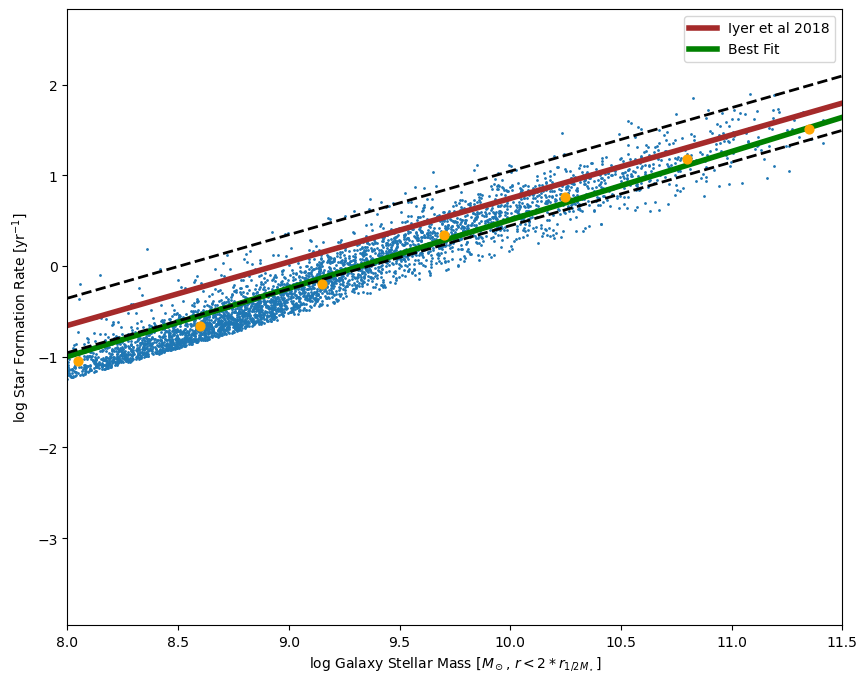

In [37]:
plot_iyer(1,log_ms,log_sfr,logms_binned,logsfr_binned)

In [38]:
Subhalomass_gas=np.concatenate((z1_Subhalomass_gas,z2_Subhalomass_gas,z3_Subhalomass_gas),axis=None)
Subhalomass_star=np.concatenate((z1_Subhalomass_star,z2_Subhalomass_star,z3_Subhalomass_star),axis=None)
Subhalomass_dm=np.concatenate((z1_Subhalomass_dm,z2_Subhalomass_dm,z3_Subhalomass_dm),axis=None)
Subhalo_reff=np.concatenate((z1_Subhalo_reff,z2_Subhalo_reff,z3_Subhalo_reff),axis=None)
Subhalo_sreff=np.concatenate((z1_Subhalo_sreff,z2_Subhalo_sreff,z3_Subhalo_sreff),axis=None)
Subhalo_sfr=np.concatenate((z1_Subhalo_sfr,z2_Subhalo_sfr,z3_Subhalo_sfr),axis=None)
Subhalo_Vmax=np.concatenate((z1_Subhalo_Vmax,z2_Subhalo_Vmax,z3_Subhalo_Vmax),axis=None)
Subhalo_Sigma=np.concatenate((z1_Subhalo_Sigma,z2_Subhalo_Sigma,z3_Subhalo_Sigma),axis=None)
Subhalo_mass=np.concatenate((z1_Subhalo_mass,z2_Subhalo_mass,z3_Subhalo_mass),axis=None)
z=np.concatenate((z1,z2,z3),axis=None)

# MASSSIZE

In [39]:
good_ones=np.where(Subhalo_sreff > 0)
fields=[Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z]

newfields=[field[good_ones] for field in fields]
Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z=newfields

In [40]:
log_ms=np.log10(Subhalomass_star)
log_sreff=np.log10(Subhalo_sreff)

In [41]:
good_ones=np.where((log_ms > 8) & (log_ms <11.5))
fields=[Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z]

newfields=[field[good_ones] for field in fields]
Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z=newfields

In [42]:
log_ms=np.log10(Subhalomass_star)
log_reff=np.log10(Subhalo_sreff)

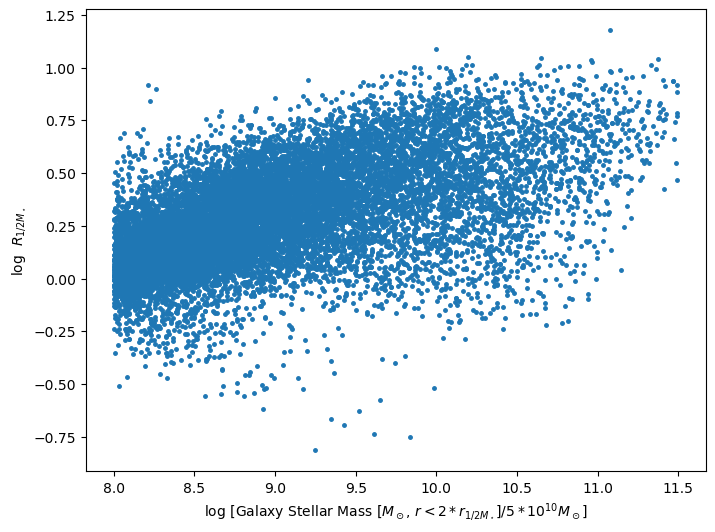

In [43]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(log_ms,log_reff,'.',markersize=5)

ax.set_xlabel('log [Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}]/5*10^{10}M_\odot$]')
ax.set_ylabel('log  $R_{1/2 M_\star}$')
plt.show()

## MASS-SIZE RELATION

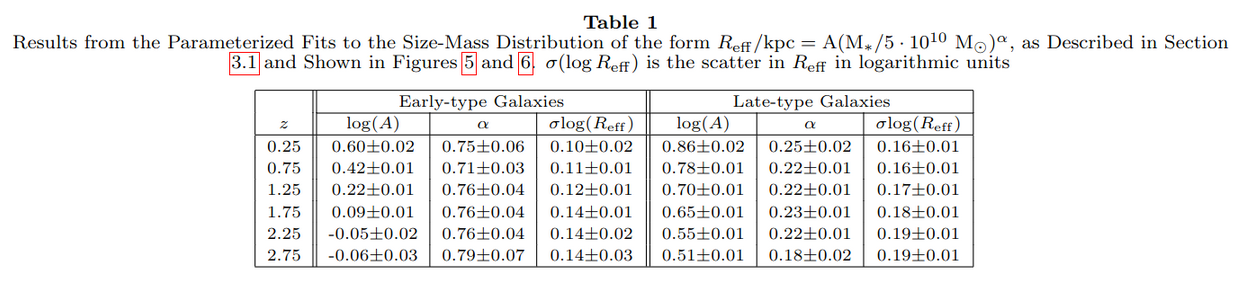


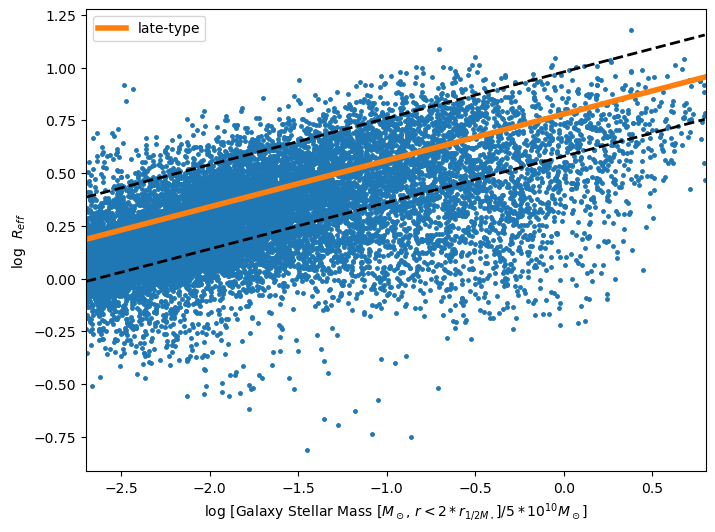

In [44]:
log_ms_scaled=log_ms-np.log10(5e+10)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

ax.plot(log_ms_scaled,log_reff,'.',markersize=5)

ax.set_xlabel('log [Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}]/5*10^{10}M_\odot$]')
ax.set_ylabel('log  $R_{eff}$')

x=np.linspace(min(log_ms_scaled),max(log_ms_scaled))
ax.plot(x,0.78+0.22*x,label='late-type',linewidth=4)
ax.plot(x,0.78+0.22*x-0.2,'--',color='black',linewidth=2)
ax.plot(x,0.78+0.22*x+0.2,'--',color='black',linewidth=2)
ax.set_xlim(-2.7,0.802)

ax.legend()
plt.show()

## MATCHING

In [45]:
def mass_size(logmass_scaled):
    return 0.78+0.22*logmass_scaled

Apply as selection cut of 0.4 dex on either side of the mass-size relation

In [46]:
good_ones=np.where(abs(mass_size(log_ms_scaled)-log_reff)<0.4)
fields=[Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z]

newfields=[field[good_ones] for field in fields]
Subhalomass_gas,Subhalomass_star,Subhalomass_dm,Subhalo_reff,Subhalo_sreff,Subhalo_sfr,Subhalo_Vmax,Subhalo_Sigma,Subhalo_mass,z=newfields

In [47]:
log_ms=np.log10(Subhalomass_star)
log_reff=np.log10(Subhalo_sreff)
log_ms_scaled=log_ms-np.log10(5e+10)

## Binning the Data

In [48]:
logms_scaled_binned,logreff_binned=bin_data(log_ms_scaled,log_reff,20)

In [49]:
x_values=np.linspace(log_ms_scaled.min(),log_ms_scaled.max(),100)

In [50]:
m,c=curve_fit(line,logms_scaled_binned,logreff_binned)[0]

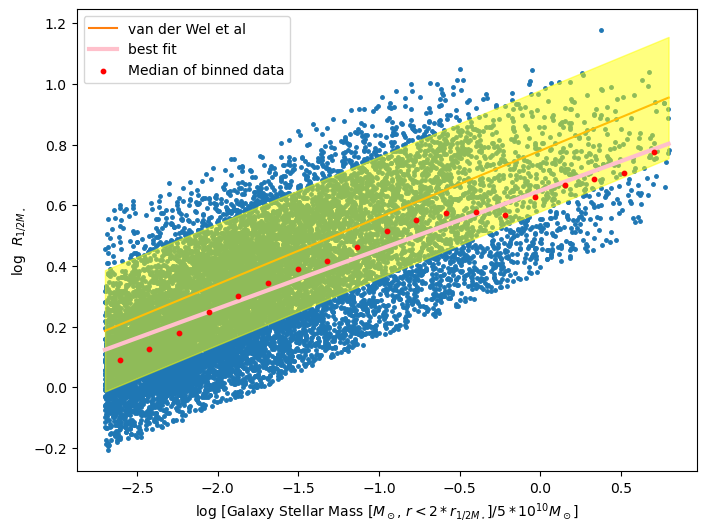

In [51]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(log_ms_scaled,log_reff,'.',markersize=5)
ax.plot(x_values,mass_size(x_values),label='van der Wel et al')
ax.plot(x_values,x_values*m+c,label='best fit',zorder=3,color='pink',linewidth=3)
ax.scatter(logms_scaled_binned,logreff_binned,color='red',s=10,zorder=3,label='Median of binned data')
ax.fill_between(x_values,mass_size(x_values)+0.2,mass_size(x_values)-0.2,color='yellow',alpha=0.5,zorder=2)

ax.set_xlabel('log [Galaxy Stellar Mass [$M_\odot$, $r < 2*r_{1/2 M_\star}]/5*10^{10}M_\odot$]')
ax.set_ylabel('log  $R_{1/2 M_\star}$')
ax.legend()
plt.show()

In [52]:
df=pd.DataFrame({'$M_{gas},M_{\odot}$':Subhalomass_gas,'$M_{stellar},M_{\odot}$':Subhalomass_star,'$M_{DM},M_{\odot}$':Subhalomass_dm,'$R_{eff}$(kpc)':Subhalo_reff,'SFR($M_{\odot}/yr$)':Subhalo_sfr,'$V_{max}$(km/s)':Subhalo_Vmax,'$\sigma_v$(km/s)':Subhalo_Sigma,
                'M':Subhalo_mass,'z':z})
df

,"$M_{gas},M_{\odot}$","$M_{stellar},M_{\odot}$","$M_{DM},M_{\odot}$",$R_{eff}$(kpc),SFR($M_{\odot}/yr$),$V_{max}$(km/s),$\sigma_v$(km/s),M,z
0,4.986144e+10,5.116296e+10,4.116813e+11,28.781115,7.841796,211.049911,111.167702,5.127939e+11,0.5
1,4.576476e+09,6.400731e+10,4.822043e+11,23.588831,1.419040,290.646759,129.286530,5.509722e+11,0.5
2,8.309998e+09,7.015903e+10,3.688245e+11,24.677858,2.303437,285.417786,113.904022,4.474460e+11,0.5
3,1.830650e+10,3.518143e+10,2.713539e+11,22.899715,3.300593,181.856354,95.473663,3.248752e+11,0.5
4,2.643326e+10,1.608991e+10,2.167360e+11,23.004526,4.343979,156.635742,86.501900,2.592760e+11,0.5
...,...,...,...,...,...,...,...,...,...
13288,1.804187e+09,2.132837e+08,2.254393e+10,13.334909,0.100453,63.731571,35.973007,2.456140e+10,1.0
13289,2.759201e+09,1.016230e+08,1.745517e+10,12.354366,0.072540,59.480797,33.701946,2.031599e+10,1.0
13290,2.653299e+09,1.034905e+08,1.561840e+10,14.018921,0.060400,54.672279,31.435001,1.837519e+10,1.0
13291,1.889676e+09,1.453692e+08,2.028790e+10,14.970785,0.090948,57.061504,32.425556,2.232295e+10,1.0


In [53]:
df.to_csv('0.45-1.05.csv')